In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

## Dicionário

* `hotel` - dois tipos de hotel, Resort Hotel e City Hotel.
* `is_canceled` - indica se a reserva foi cancelada (1) ou não (0)
* `lead_time` - número de dias transcorridos entre a data de entrada da reserva no sistema e a data de chegada ao hotel
* `arrival_date_year` - ano da data de chegada
* `arrival_date_month` - mês da data de chegada
* `arrival_date_week_number` - número da semana da data de chegada
* `arrival_date_day_of_month` - dia do mês da data de chegada
* `stays_in_weekend_nights` - número de noites de fim de semana (sábado ou domingo) em que o hóspede ficou ou reservou para ficar no hotel. 
* `stays_in_week_nights` - número de noites da semana (segunda a sexta) em que o hóspede ficou ou reservou para ficar no hotel.
* `adults` - número de adultos
* `children` - número de crianças
* `babies` - número de bebês
* `meal` - tipo de refeição reservada.
* `country` - país de origem
* `market_segment` - segmento de mercado
* `distribution_channel` - canal de distribuição da reserva.
* `is_repeated_guest` - valor indicando se o nome da reserva foi de um convidado repetido (1) ou não (0)
* `previous_cancellations` - número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual      
* `previous_bookings_not_canceled` - número de reservas anteriores que não foram canceladas pelo cliente antes da reserva atual
* `reserved_room_type` - código do tipo de quarto reservado.
* `assigned_room_type` - código para o tipo de quarto designado para a reserva.           
* `booking_changes` - número de mudanças/alterações feitas na reserva desde o momento em que a reserva foi inserida no sistema até o momento do check-in ou cancelamento.
* `deposit_type` - indicação sobre se o cliente fez um depósito para garantir a reserva.               
* `agent` -  ID da agência de viagens que fez a reserva
* `company` - ID da empresa/entidade que fez a reserva ou responsável pelo pagamento da reserva.               
* `days_in_waiting_list` - Número de dias em que a reserva estava na lista de espera antes de ser confirmada ao cliente            
* `customer_type` - tipo da reserva.           
* `adr` - taxa diária média                             
* `required_car_parking_spaces` - número de vagas de estacionamento necessárias para o cliente  
* `total_of_special_requests` - número de pedidos especiais feitos pelo cliente     
* `reservation_status` - status da reserva       
* `reservation_status_date` - data na qual o último status foi definido.

# Preparação e Limpeza Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print('Total de variáveis:', df.shape[1])
print('Total de entradas:', df.shape[0])

Total de variáveis: 32
Total de entradas: 119390


In [4]:
df['is_canceled'].mean()

0.37041628277075134

In [5]:
pd.DataFrame({'tipo de dados':df.dtypes,
                'dados_ausentes(%)': (df.isnull().sum()/df.shape[0])*100,
                    'valores unicos': df.nunique()})


,tipo de dados,dados_ausentes(%),valores unicos
hotel,object,0.000000,2
is_canceled,int64,0.000000,2
lead_time,int64,0.000000,479
arrival_date_year,int64,0.000000,3
arrival_date_month,object,0.000000,12
arrival_date_week_number,int64,0.000000,53
arrival_date_day_of_month,int64,0.000000,31
stays_in_weekend_nights,int64,0.000000,17
stays_in_week_nights,int64,0.000000,35
adults,int64,0.000000,14


In [6]:
df.drop(columns = ['agent', 'company'], inplace=True)

In [7]:
pd.DataFrame({'tipo de dados':df.dtypes,
                'dados_ausentes(%)': (df.isnull().sum()/df.shape[0])*100,
                    'valores unicos': df.nunique()})


,tipo de dados,dados_ausentes(%),valores unicos
hotel,object,0.000000,2
is_canceled,int64,0.000000,2
lead_time,int64,0.000000,479
arrival_date_year,int64,0.000000,3
arrival_date_month,object,0.000000,12
arrival_date_week_number,int64,0.000000,53
arrival_date_day_of_month,int64,0.000000,31
stays_in_weekend_nights,int64,0.000000,17
stays_in_week_nights,int64,0.000000,35
adults,int64,0.000000,14


In [8]:
df = df.dropna(subset=['children', 'country']).reset_index(drop=True)

In [9]:
df['total_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.drop(columns = ['stays_in_week_nights', 'stays_in_weekend_nights'], inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days
0,Resort Hotel,0,342,2015,July,27,1,2,0.0,0,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,2,0.0,0,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,2,0.0,0,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [10]:
filtro = (df['babies'] == 0) & (df['children'] == 0) & (df['adults'] == 0)
df = df[~filtro]

In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.reset_index(drop=True, inplace= True)

In [13]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days
0,Resort Hotel,0,342,2015,July,27,1,2,0.0,0,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,2,0.0,0,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,2,0.0,0,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86748,City Hotel,0,23,2017,August,35,30,2,0.0,0,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
86749,City Hotel,0,102,2017,August,35,31,3,0.0,0,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
86750,City Hotel,0,34,2017,August,35,31,2,0.0,0,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
86751,City Hotel,0,109,2017,August,35,31,2,0.0,0,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [14]:
#substituindo os codigos

#replace Undefined, BB, FB, HB, SC to its meaning. 
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'], 
                   [ 'No Meal', 'Breakfast', 'Full Board', 'Half Board', 'No Meal'],
                   inplace = True)


In [15]:
countries_code = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
countries_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [16]:
dict_country= {}
for i,j in zip(countries_code['alpha-3'], countries_code['name']):
    dict_country[i] = j

In [17]:
df['country'].replace(dict_country, inplace= True)

In [18]:
df['country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

In [19]:
#is_canceled 
confirmed = df.loc[df['is_canceled'] == 0]

# Análise Exploratória e Visualização

## DF

### Reservas realizadas

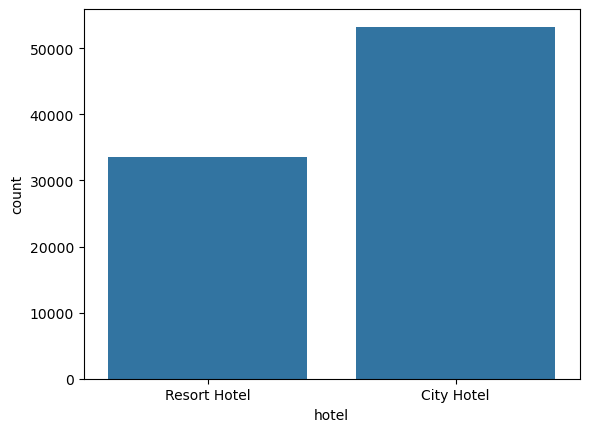

In [20]:
sns.countplot(x='hotel', data = df);

### Quantidade de cancelamento

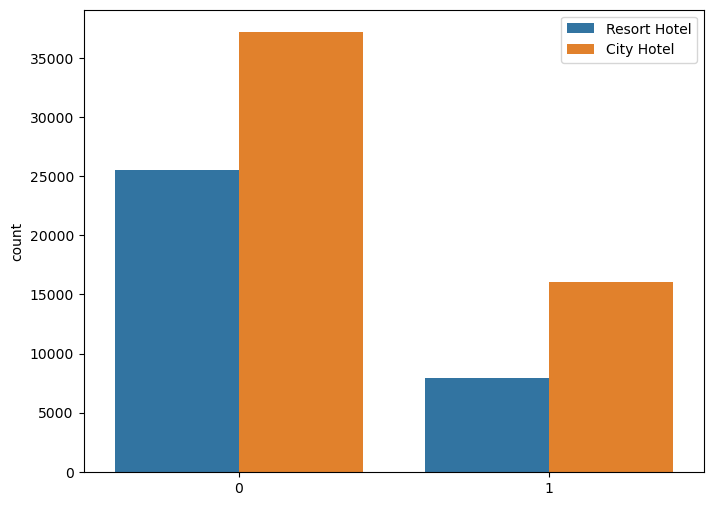

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['is_canceled'], hue = 'hotel', data = df)
plt.xlabel(' ');
plt.legend(title = '')


### De onde são os hóspedes?

In [22]:
# quantidade de reservas por país
# os dez maiores 
df['country'].value_counts().iloc[0:10]

country
Portugal          27338
United Kingdom    10422
France             8823
Spain              7242
Germany            5383
Italy              3060
Ireland            3015
Belgium            2081
Brazil             1991
Netherlands        1910
Name: count, dtype: int64

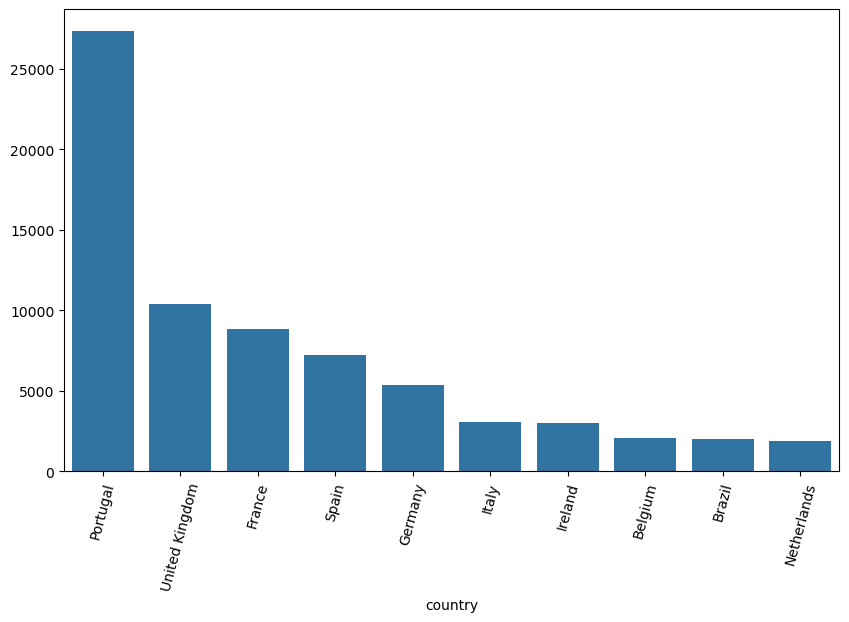

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x = df['country'].value_counts().iloc[0:10].index, y = df['country'].value_counts().iloc[0:10].values)
plt.xticks(rotation = 75);

### Efeito do hospede repetido nos cancelamentos

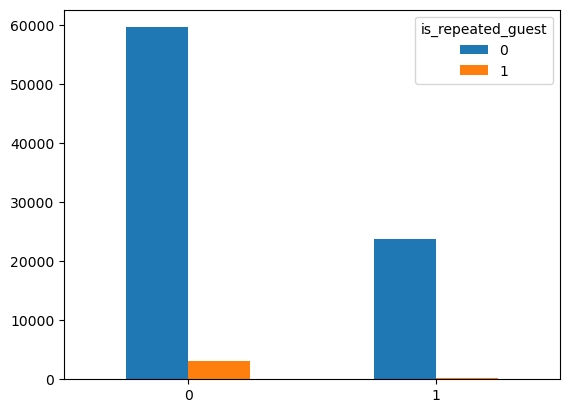

In [24]:
df.groupby('is_canceled')['is_repeated_guest'].value_counts().unstack().plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.tight_layout;

<Axes: >

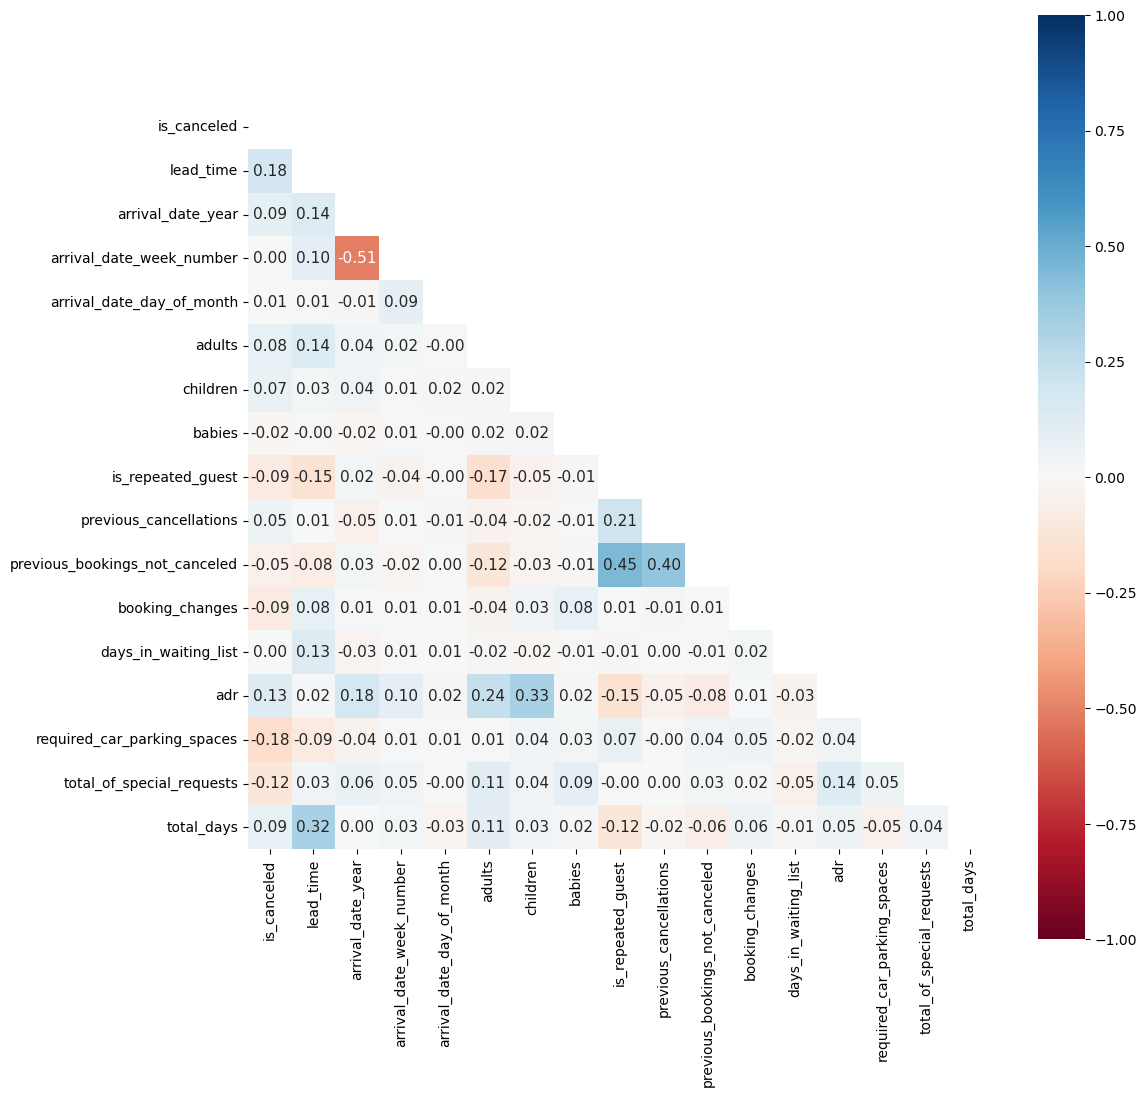

In [26]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sns.heatmap(df.corr(numeric_only=True), cmap = 'RdBu', linecolor= 'white', annot=True,fmt='.2f', square=True, vmin=-1.0, vmax = 1.0, mask = mask, annot_kws={'size': 11})

In [27]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_days
count,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000
mean,0.276325,80.278803,2016.211900,26.838830,15.818635,1.882091,0.139511,0.010835,0.038731,0.030224,0.176801,0.268775,0.750395,106.756917,0.083548,0.699872,3.634341
std,0.447182,86.108773,0.685937,13.649083,8.834789,0.621202,0.457232,0.113614,0.192953,0.369819,1.719219,0.711478,10.028305,54.839562,0.280557,0.831978,2.727991
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.290000,0.000000,0.000000,2.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.670000,0.000000,0.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.140000,0.000000,1.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,56.000000


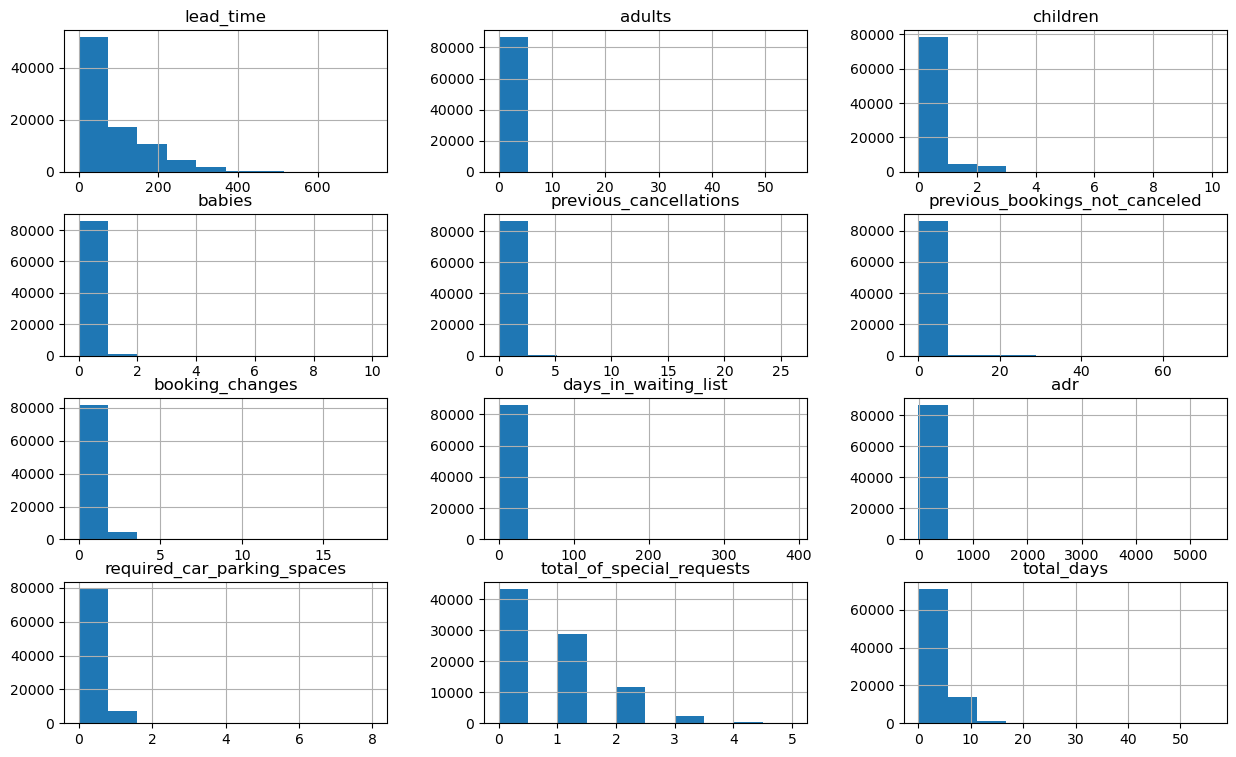

In [28]:
df.hist(['lead_time', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces' , 'total_of_special_requests', 'total_days'], 
        figsize=(15,9),);

In [29]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_days
count,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000,86753.000000
mean,0.276325,80.278803,2016.211900,26.838830,15.818635,1.882091,0.139511,0.010835,0.038731,0.030224,0.176801,0.268775,0.750395,106.756917,0.083548,0.699872,3.634341
std,0.447182,86.108773,0.685937,13.649083,8.834789,0.621202,0.457232,0.113614,0.192953,0.369819,1.719219,0.711478,10.028305,54.839562,0.280557,0.831978,2.727991
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.290000,0.000000,0.000000,2.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.670000,0.000000,0.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.140000,0.000000,1.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,56.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86753 entries, 0 to 86752
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86753 non-null  object 
 1   is_canceled                     86753 non-null  int64  
 2   lead_time                       86753 non-null  int64  
 3   arrival_date_year               86753 non-null  int64  
 4   arrival_date_month              86753 non-null  object 
 5   arrival_date_week_number        86753 non-null  int64  
 6   arrival_date_day_of_month       86753 non-null  int64  
 7   adults                          86753 non-null  int64  
 8   children                        86753 non-null  float64
 9   babies                          86753 non-null  int64  
 10  meal                            86753 non-null  object 
 11  country                         86753 non-null  object 
 12  market_segment                  

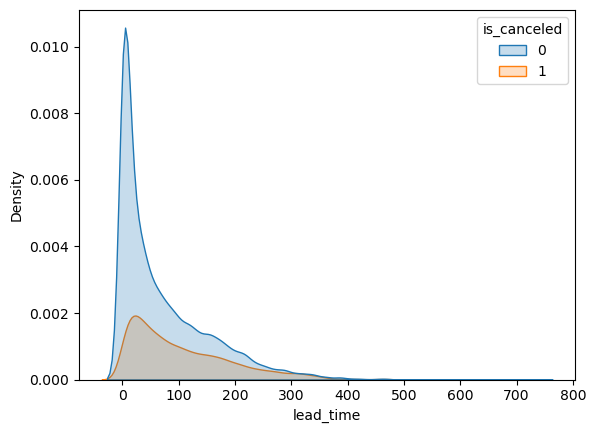

In [31]:
# Tempo de espera e cancelamento
sns.kdeplot(data=df, x='lead_time', hue = 'is_canceled', shade=True);

## Confirmed

### Refeição realizada

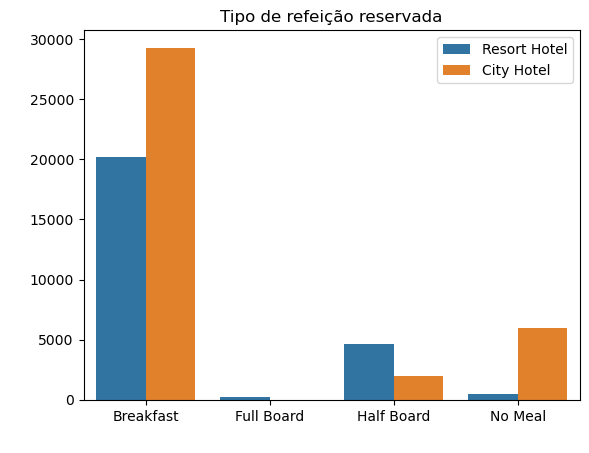

In [32]:
ax = sns.countplot(data = confirmed , x = 'meal', hue = 'hotel')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
plt.legend(loc = 'upper right')
ax.set_title('Tipo de refeição reservada')
plt.tight_layout;

### Meses com mais reservas

In [33]:
confirmed.groupby('arrival_date_year')['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               September             2255
                   October               2233
                   August                1863
                   December              1582
                   November              1397
                   July                  1147
2016               October               3000
                   August                2965
                   March                 2906
                   May                   2823
                   September             2759
                   July                  2738
                   April                 2731
                   June                  2593
                   November              2482
                   February              2240
                   December              2107
                   January               1514
2017               May                   3065
                   July                  2931
                   June                  2

In [34]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [35]:
confirmed.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days
0,Resort Hotel,0,342,2015,July,27,1,2,0.0,0,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,2,0.0,0,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,2,0.0,0,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


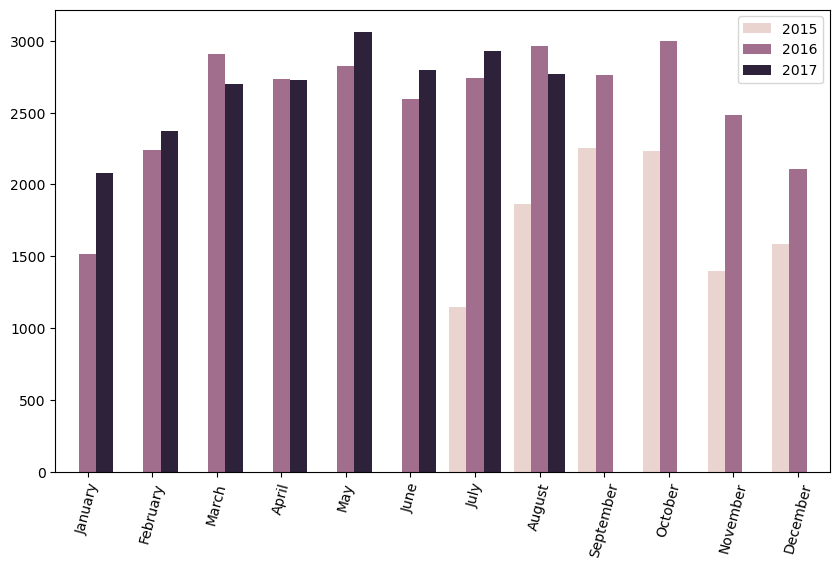

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data = confirmed, x = 'arrival_date_month', hue = 'arrival_date_year', order = month)
plt.xticks(rotation =75);
plt.legend(title = '')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout;

### Quanto tempo dura a hospedagem?

In [37]:
#round(confirmed.groupby(['arrival_date_year', 'hotel'])['total_days'].mean(), 2).plot(kind= 'bar', legend = confirmed['hotel'])
print('O tempo médio das hospedagens é de: \n Em 2015, {:.2f} noites \n Em 2016, {:.2f} noites \n Em 2017, {:.2f} noites'.format(confirmed.groupby('arrival_date_year')['total_days'].mean().iloc[0], confirmed.groupby('arrival_date_year')['total_days'].mean().iloc[1], confirmed.groupby('arrival_date_year')['total_days'].mean().iloc[2]))

O tempo médio das hospedagens é de: 
 Em 2015, 3.70 noites 
 Em 2016, 3.38 noites 
 Em 2017, 3.55 noites


### Reservas realizadas por segmentos

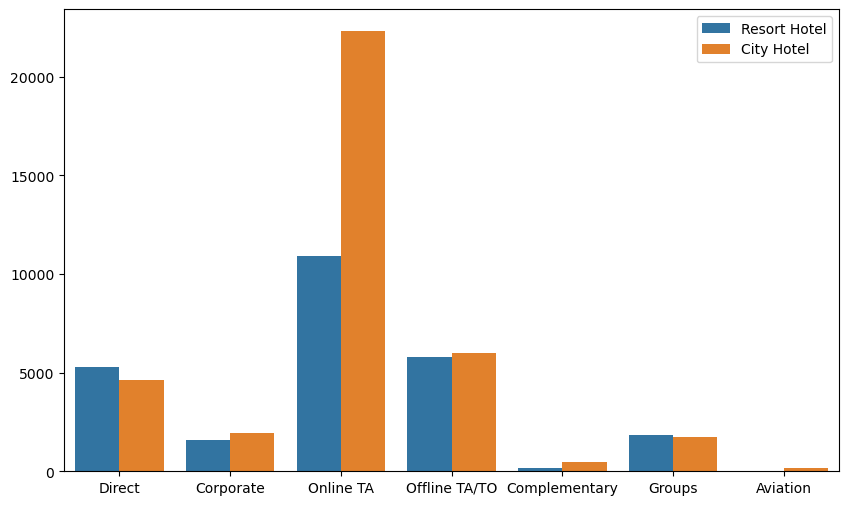

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data = confirmed, x = 'market_segment', hue = 'hotel')
plt.legend(title = '')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout;

### Hotel com mais tempo gasto

In [39]:
confirmed.groupby('hotel')['total_days'].sum()

hotel
City Hotel      111102
Resort Hotel    108052
Name: total_days, dtype: int64

## Canceled

### Mês com o maior número de cancelamentos

In [40]:
canceled = df.loc[df['is_canceled'] == 'canceled']

In [41]:
canceled.groupby('arrival_date_year')['arrival_date_month'].value_counts()

Series([], Name: count, dtype: int64)

###  Efeito dos depósitos nos cancelamentos por segmentos

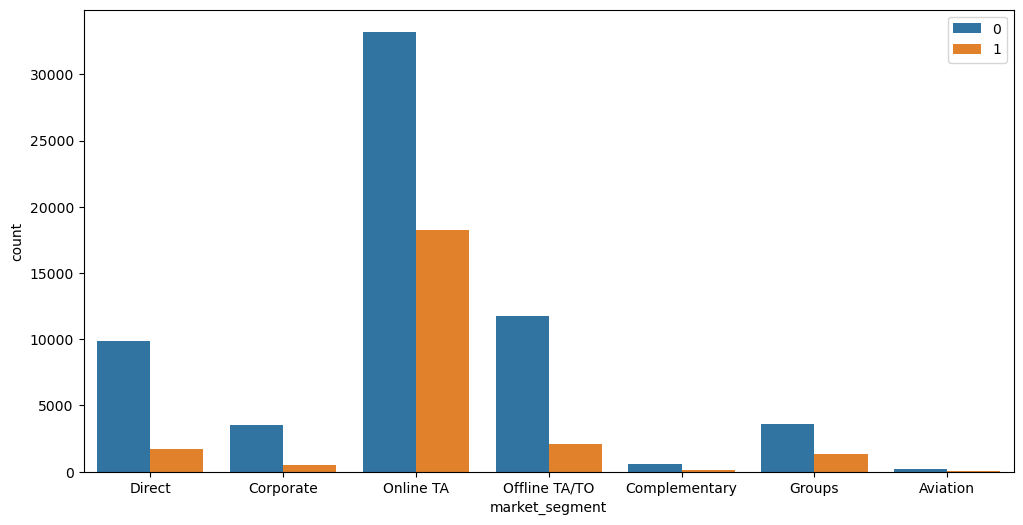

In [42]:
## Numeros absolutos
plt.figure(figsize=(12,6))
sns.countplot(data = df, 
              x = 'market_segment', 
              hue ='is_canceled', 
              )
plt.legend(loc = 'upper right')
plt.tight_layout;

In [43]:
# print(' Aviation \n  Total Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Complementary \n  Total de Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Corporate \n  Total Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Direct \n   Total de Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Groups \n   Total Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Offline TA/TO \n  Total de Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Online TA \n  Total Reservas: {} \n  Porcentagem de cancelamentos: {} \n\n \
# Undefined \n  Total de Reservas: {}'.format((df.groupby('market_segment')['is_canceled'].value_counts()[0] + df.groupby('market_segment')['is_canceled'].value_counts()[1]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[1]/(df.groupby('market_segment')['is_canceled'].value_counts()[0] + df.groupby('market_segment')['is_canceled'].value_counts()[1])*100),2), \
#                                              (df.groupby('market_segment')['is_canceled'].value_counts()[2] + df.groupby('market_segment')['is_canceled'].value_counts()[3]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[3]/(df.groupby('market_segment')['is_canceled'].value_counts()[2] + df.groupby('market_segment')['is_canceled'].value_counts()[3])*100),2), \
#                                                 (df.groupby('market_segment')['is_canceled'].value_counts()[4] + df.groupby('market_segment')['is_canceled'].value_counts()[5]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[5]/(df.groupby('market_segment')['is_canceled'].value_counts()[4] + df.groupby('market_segment')['is_canceled'].value_counts()[5])*100),2), \
#                                                     (df.groupby('market_segment')['is_canceled'].value_counts()[6] + df.groupby('market_segment')['is_canceled'].value_counts()[7]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[7]/(df.groupby('market_segment')['is_canceled'].value_counts()[6] + df.groupby('market_segment')['is_canceled'].value_counts()[7])*100),2), \
#                                                     (df.groupby('market_segment')['is_canceled'].value_counts()[8] + df.groupby('market_segment')['is_canceled'].value_counts()[9]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[9]/(df.groupby('market_segment')['is_canceled'].value_counts()[8] + df.groupby('market_segment')['is_canceled'].value_counts()[9])*100),2), \
#                                                     (df.groupby('market_segment')['is_canceled'].value_counts()[10] + df.groupby('market_segment')['is_canceled'].value_counts()[11]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[11]/(df.groupby('market_segment')['is_canceled'].value_counts()[10] + df.groupby('market_segment')['is_canceled'].value_counts()[11])*100),2), \
#                                                     (df.groupby('market_segment')['is_canceled'].value_counts()[12] + df.groupby('market_segment')['is_canceled'].value_counts()[13]), \
#                                             round((df.groupby('market_segment')['is_canceled'].value_counts()[13]/(df.groupby('market_segment')['is_canceled'].value_counts()[12] + df.groupby('market_segment')['is_canceled'].value_counts()[13])*100),2), \
#                                                     (df.groupby('market_segment')['is_canceled'].value_counts()[14]))                                                      )

<Axes: xlabel='market_segment', ylabel='count'>

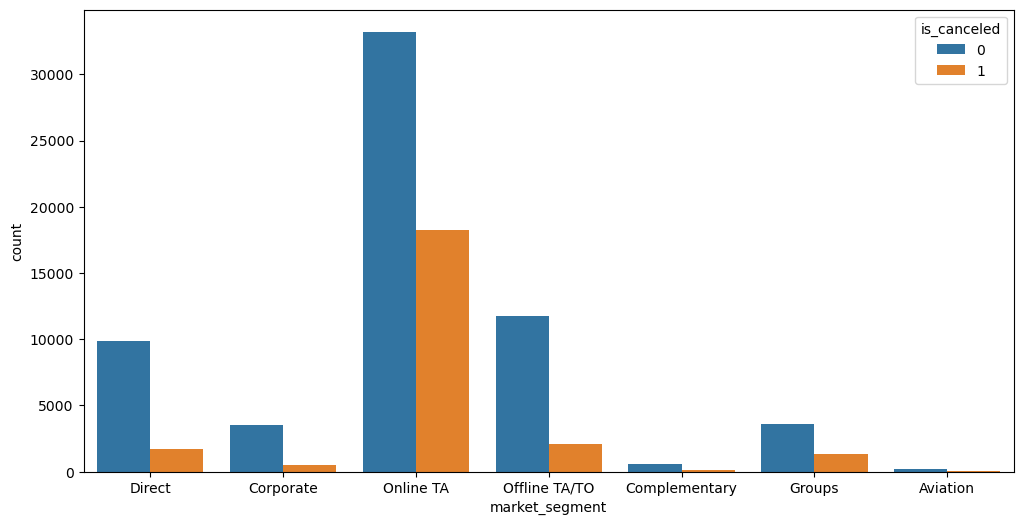

In [44]:
## Numeros absolutos
plt.figure(figsize=(12,6))
sns.countplot(data = df, 
              x = 'market_segment',
              hue = 'is_canceled')